## Digit Recognizer

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this lab, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

Dataset:
https://www.kaggle.com/c/digit-recognizer/data

In [49]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#Import the train data
df_train=pd.read_csv("train.csv")

In [51]:
#Check the shape of the data
df_train.shape

(42000, 785)

In [61]:
#Select only 10% of the data for experiment. We will not use total data as KNN is very slow
train_data=df_train.sample(n=4200)
print(train_data)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
15368      6       0       0       0       0       0       0       0       0   
12507      8       0       0       0       0       0       0       0       0   
26460      2       0       0       0       0       0       0       0       0   
4377       0       0       0       0       0       0       0       0       0   
3824       1       0       0       0       0       0       0       0       0   
559        2       0       0       0       0       0       0       0       0   
10430      5       0       0       0       0       0       0       0       0   
21158      5       0       0       0       0       0       0       0       0   
25038      7       0       0       0       0       0       0       0       0   
7880       9       0       0       0       0       0       0       0       0   
21001      5       0       0       0       0       0       0       0       0   
796        6       0       0       0    

In [62]:
train_data.shape

(4200, 785)

In [63]:
#Print shape of selected dataset
train_data.shape

(4200, 785)

In [64]:
train_data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
15368,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12507,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26460,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3824,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#Look at top 5 rwos
train_data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
15368,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12507,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26460,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3824,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#Find number of unique class labels
train_data['label'].unique()

array([6, 8, 2, 0, 1, 5, 7, 9, 4, 3], dtype=int64)

In [67]:
#Print the number of examples for each class label
train_data.groupby('label').size()

label
0    412
1    474
2    408
3    442
4    381
5    422
6    389
7    424
8    431
9    417
dtype: int64

In [68]:
#Prepare X and y
X=train_data.iloc[:,1:].values
Y=train_data.iloc[:,:1].values
print(X.shape)
print(Y.shape)

(4200, 784)
(4200, 1)


[6]


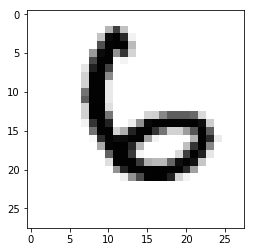

[8]


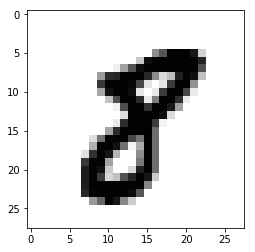

[2]


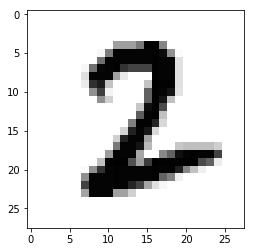

[0]


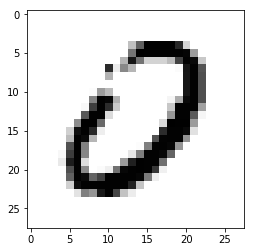

[1]


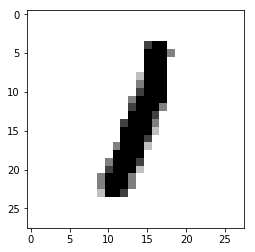

In [89]:
#Visualize the images of the first 5 digits in X - also print the class label in y
for i in range(5):
    d=X[i]
    print(Y[i])
    d.shape=(28,28)
    plt.imshow(255-d,cmap='gray')
    plt.show()

In [75]:
#Split the train dataset into training set (75%) and validation set(25%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(3150, 784) (1050, 784)
(3150, 1) (1050, 1)


In [76]:
#Split the train dataset into training set (75%) and validation set(25%)
from sklearn.model_selection import train_test_split
X_train,X_vset,Y_train,Y_vset=train_test_split(X_train,Y_train,test_size=0.25,random_state=0)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(2362, 784) (1050, 784)
(2362, 1) (1050, 1)


In [78]:
#Fit KNN classifier to the training data
#Default parameters - n_neighbors=5, metric = 'minkowski', p=2
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)

/home/naveen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [83]:
#Predict the validation set results
y_pred=classifier.predict(X_test)
y_pred
print(Y.shape,y_pred.shape)

(4200, 1) (1050,)


In [85]:
#Print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[103,   0,   0,   0,   0,   1,   1,   0,   0,   0],
       [  0, 116,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,  10, 101,   0,   1,   0,   1,   5,   0,   0],
       [  0,   2,   1,  90,   0,   2,   1,   1,   2,   2],
       [  0,   1,   0,   0,  84,   0,   0,   0,   0,   5],
       [  1,   1,   0,   7,   0,  96,   2,   0,   1,   3],
       [  5,   1,   0,   0,   0,   0,  93,   0,   0,   0],
       [  0,   2,   0,   0,   1,   0,   0,  83,   0,   3],
       [  3,   6,   1,   5,   1,   6,   0,   3,  86,   4],
       [  0,   2,   0,   1,   2,   2,   0,  10,   0,  87]], dtype=int64)

In [86]:
# Printing classification report and accuracy
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       105
           1       0.82      0.99      0.90       117
           2       0.97      0.85      0.91       119
           3       0.87      0.89      0.88       101
           4       0.94      0.93      0.94        90
           5       0.90      0.86      0.88       111
           6       0.95      0.94      0.94        99
           7       0.81      0.93      0.87        89
           8       0.97      0.75      0.84       115
           9       0.84      0.84      0.84       104

   micro avg       0.89      0.89      0.89      1050
   macro avg       0.90      0.90      0.89      1050
weighted avg       0.90      0.89      0.89      1050

0.8942857142857142


7


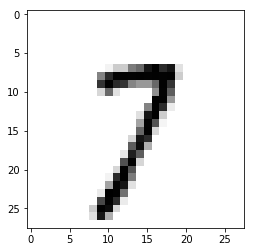

9


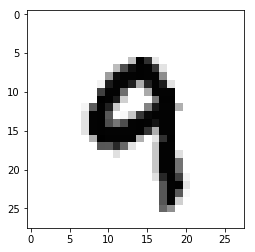

0


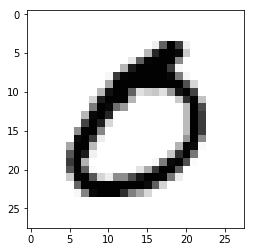

3


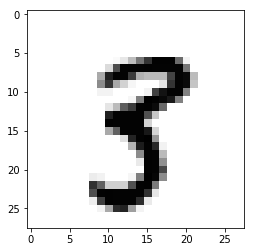

1


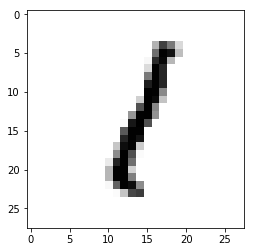

In [88]:
#Visualize the image of the first 5 digits in X_test - also print the predicted class label in y_pred
for i in range(5):
    d=X_test[i]
    print(y_pred[i])
    d.shape=(28,28)
    plt.imshow(255-d,cmap='gray')
    plt.show()

In [68]:
#Implement your own KNN classifier using Euclidean distance
class MyKNN:
    def __init__(self, n_neighbors):
        #Initialize
        
                
    def fit():
        #Fit the data
        
        
    def pred():
        #Make prediction
        
        
        

IndentationError: expected an indented block (<ipython-input-68-936c0db09be9>, line 7)

In [ ]:
#Fit your model and make prediction

